# The various steps before creating a predictive machine learning model for any given dataset - v1

The aim of this project is to expose the important steps required before carrying out any machine learning task for any given dataset and the dataset from the 1994 US census will be used as obtained from https://openml.org/.

The dataset is available as a CSV (Comma-Separated Values) file and we use pandas to read it.
 
Pandas (https://pandas.pydata.org/) is a Python library used for manipulating 1D or 2D structured data.

For further study: https://pandas.pydata.org/docs/user_guide/10min.html

It is important to clearly have a good understanding of the kind of dataset you will be working with as this guides you on the type of analysis you will be performing and also build your research questions based on the situation surrounding your choice of research or findings.

These steps include:

 - 1. Get ready your choice notebook 

 - 2. Load necessary libraries needed for the analysis
    
 - 3. Loading of the dataset
  
 - 4. Looking at the variables in the dataset - you should be able to differentiate between numerical and categorical variables. This is essential because different preprocessing steps are required for each of the type of variables in most machine learning workflows.
  
 - 5. Visualizing the distribution of the variables to gain some insights into the dataset.

 - 6. Decision Rule
  

###### For description of the dataset:
https://www.openml.org/search?type=data&sort=runs&id=1590&status=active

2. #### Loading the libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

3. #### Loading the adult census dataset

In [7]:
adult_census = pd.read_csv('../datafolder/adult-census.csv')
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


###### `3.1` Research Goal

4. #### Observing the columns and rows of the dataset

In [8]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [13]:
# Statistical description

adult_census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
adult_census['class'].value_counts()

class
 <=50K    37155
 >50K     11687
Name: count, dtype: int64

In [14]:
adult_census.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

###### `4.1` Declaring the columns

In [24]:
target_column = 'class'

numerical_columns = ['age', 'education-num',
                     'capital-gain', 'capital-loss',
                     'hours-per-week']

categorical_columns = ['workclass', 'education',
                       'marital-status', 'occupation',
                       'relationship', 'race',
                       'sex', 'native-country']

all_columns = numerical_columns + categorical_columns + [target_column]

all_columns

data_census = adult_census[all_columns]

data_census.head(1)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,25,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K


In [50]:
# Checking the number of samples and the number of columns available in the dataset

print(f"The adult_census dataset contains {data_census.shape[0]} samples and {data_census.shape[1]} columns")

The adult_census dataset contains 48842 samples and 14 columns


In [26]:
# Compute the number of features after we have selected our target
# We can compute the number of features by counting the number of columns and subtract 1,
# since one of the columns is the target.

print(f"The adult_census dataset has {data_census.shape[1] - 1} features.")

The adult_census dataset has 13 features.


5. #### Visualizing the dataset

Let's look at the distribution of individual features, to get some insights about the data. We can start by plotting histograms, note that this only works for features containing numerical values:

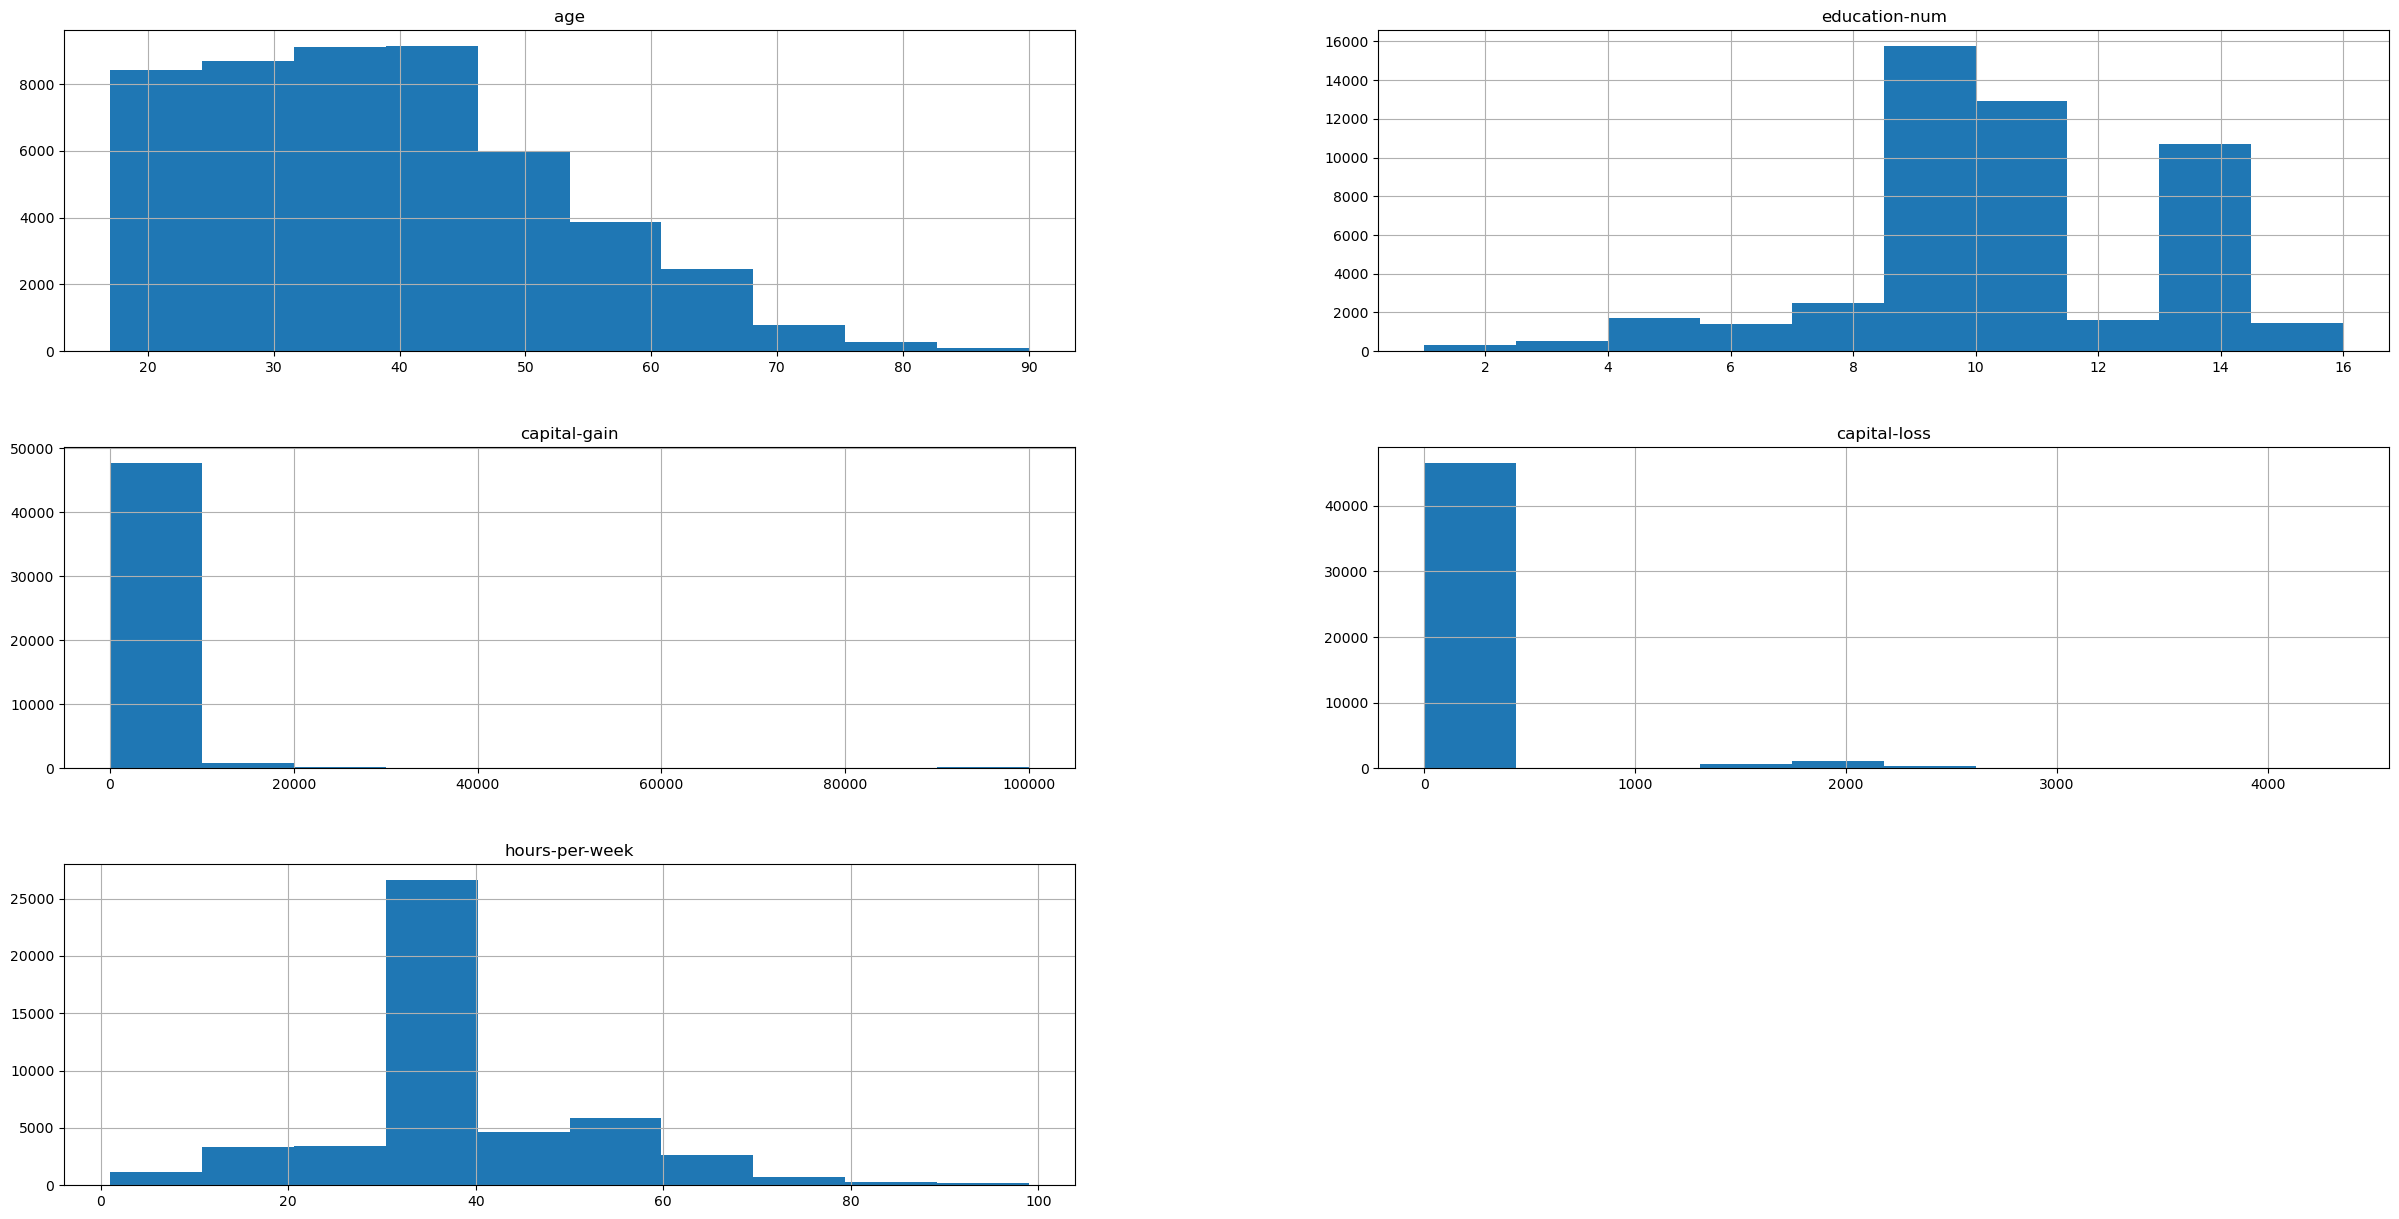

In [34]:
# Numerical columns
dist = data_census.hist(figsize=(30, 15))

We can already make a few comments about some of the variables:

 - `age`: there are not that many points for age > 70. The dataset description does indicate that retired people have been filtered out as seen from the hours-per-week distribution (hours-per-week > 0);
   
 - `education-num`: peak at 10 and 13, hard to tell what it corresponds to without looking much further. We'll do that later in this notebook. It woould be reasonable to expect that `education-num` represent the number of years of education;
   
 - `hours-per-week` peaks at 40, this was very likely the standard number of working hours at the time of the data collection;
   
 - most values of `capital-gain` and `capital-loss` are close to zero.

In [35]:
# Categorical columns
#### For categorical variables, we can look at the distribution of values:

In [36]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [40]:
data_census['workclass'].value_counts()

workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64

In [41]:
data_census['education'].value_counts()

education
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: count, dtype: int64

In [42]:
data_census['marital-status'].value_counts()

marital-status
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: count, dtype: int64

In [43]:
data_census['occupation'].value_counts()

occupation
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: count, dtype: int64

In [44]:
data_census['relationship'].value_counts()

relationship
 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: count, dtype: int64

In [45]:
data_census['race'].value_counts()

race
 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: count, dtype: int64

In [46]:
data_census['sex'].value_counts()

sex
 Male      32650
 Female    16192
Name: count, dtype: int64

In [47]:
data_census['native-country'].value_counts()

native-country
 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua             

It is important to carefully examine how the data are collected to be sure there no data imbalances.
One of the key indicator here is the column for `sex` as this should have a balanced distribution between the gender but we can see that the data collection process resulted in an important imbalance between the number of male/female samples.

Be aware that training a model with such data imbalance can cause disproportioned prediction errors for the under-represented groups. This is a typical cause of fairness problems if used naively when deploying a machine learning based system in a real life setting.

To learn more about data imbalances and how to quantify and potentially mitigate fairness issues you can visit: https://fairlearn.org/

##### Relationship between `education` and `education-num`

In [54]:
pd.crosstab(index=data_census['education'], columns=data_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


For every entry in `education`, there is only one single corresponding value in `education-num`. This shows that `education` and `education-num` give you the same information. For example, `education-num`=`2` is equivalent to `education`=`1st-4th`. 
In practice that means we can remove `education-num` without losing information. Note that having redundant (or highly correlated) columns can be a problem for machine learning algorithms.

##### We can also inspect the relationship with respect to the target

Another way to inspect the data is to do a pairplot and show how each variable differs according to our target, i.e. "class". Plots along the diagonal show the distribution of individual variables for each "class". The plots on the off-diagonal can reveal interesting interactions between variables.

In [67]:
# Make a subset of the data to keep the plot readable and make the plotting faster

num_sample = 10000

In [68]:
target_column
columns_to_plot = ['age', 'education-num', 'hours-per-week']

/Users/OLALYTICS/anaconda3/envs/self/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/OLALYTICS/anaconda3/envs/self/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/OLALYTICS/anaconda3/envs/self/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


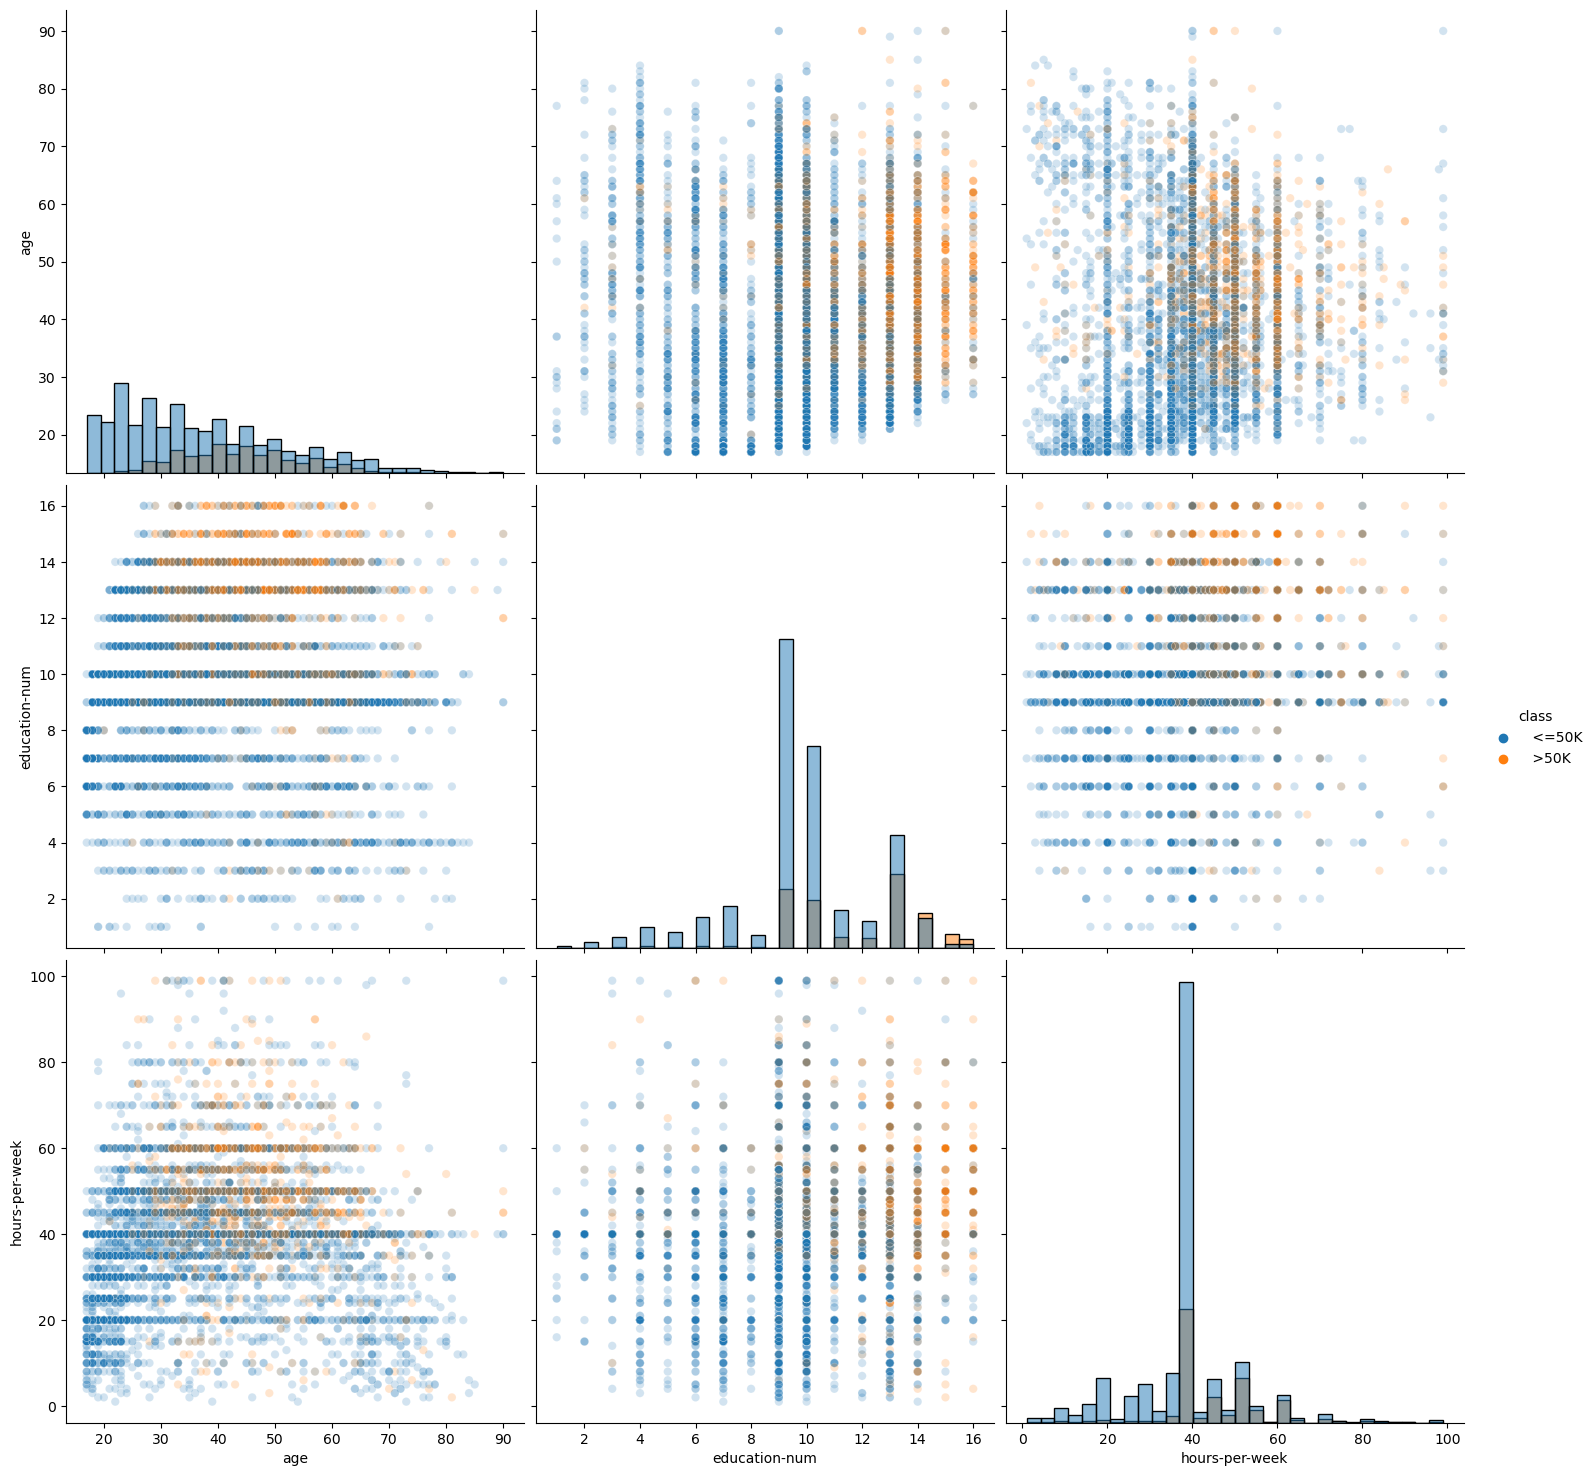

In [74]:
_ = sns.pairplot(data=data_census[:num_sample], vars=columns_to_plot, hue=target_column,
            plot_kws={'alpha': 0.2}, height=5, diag_kind='hist', diag_kws={'bins': 30})

6. #### Creating decision rules manually

By looking at the previous plots, we could create some hand-written rules that predict whether someone has a high- or low-income. For instance, we could focus on the combination of the `hours-per-week` and `age` features.

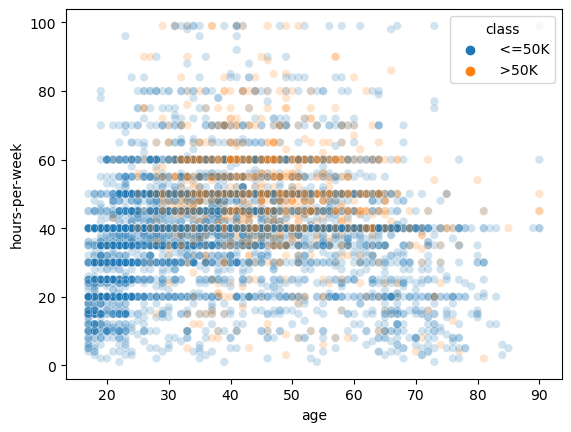

In [75]:
_ = sns.scatterplot(x='age', y='hours-per-week',
                    data=data_census[:num_sample],
                    hue=target_column, alpha=0.2)

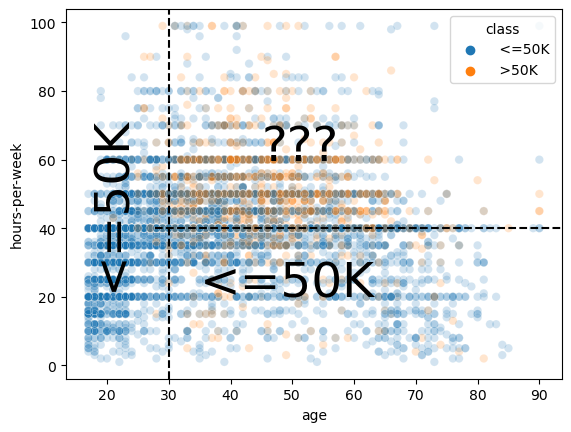

In [78]:
ax = sns.scatterplot(
    x='age',
    y='hours-per-week',
    data=adult_census[:num_sample],
    hue=target_column,
    alpha=0.2,
)

age_limit = 30
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

* In the region `age < 27` (left region) the prediction is low-income. Indeed,
  there are many blue points and we cannot see any orange points.
* In the region `age > 27 AND hours-per-week < 40` (bottom-right region), the
  prediction is low-income. Indeed, there are many blue points and only a few
  orange points.
* In the region `age > 27 AND hours-per-week > 40` (top-right region), we see
  a mix of blue points and orange points. It seems complicated to choose which
  class we should predict in this region.

It is interesting to note that some machine learning models work similarly to
what we did: they are known as decision tree models. The two thresholds that
we chose (27 years and 40 hours) are somewhat arbitrary, i.e. we chose them by
only looking at the pairplot. In contrast, a decision tree chooses the "best"
splits based on data without human intervention or inspection. Decision trees
will be covered more in detail in a future module.

Note that machine learning is often used when creating rules by hand is not
straightforward. For example because we are in high dimension (many features
in a table) or because there are no simple and obvious rules that separate the
two classes as in the top-right region of the previous plot.

To sum up, the important thing to remember is that in a machine-learning
setting, a model automatically creates the "rules" from the existing data in
order to make predictions on new unseen data.